### About the dataset

The data was provided by the organizers of the Kaggle competition under the creative commons license [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/).

The dataset contains 21 features that represent the different characteristics of the mushroom sample. It comes splitted into training and testing data.

To know more about the dataset visit the following [link](https://www.kaggle.com/competitions/playground-series-s4e8/data).

------------

### Dataset import and cleaning

In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
mushroom_train_df = pd.read_csv("train.csv")
mushroom_test_df = pd.read_csv("test.csv")

* **Shape of the data**

In [3]:
print(f"Train data {mushroom_train_df.shape}")
print(f"Test data {mushroom_test_df.shape}")

Train data (3116945, 22)
Test data (2077964, 21)


* **Overview**

In [4]:
mushroom_train_df.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
mushroom_test_df.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [6]:
mushroom_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
mushroom_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [8]:
numCols = mushroom_train_df.describe(include = np.number).columns.to_list()
catCols = mushroom_train_df.describe(include = np.object_).columns.to_list()

* **Missing data**

In [9]:
mushroom_train_df.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [10]:
mushroom_test_df.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

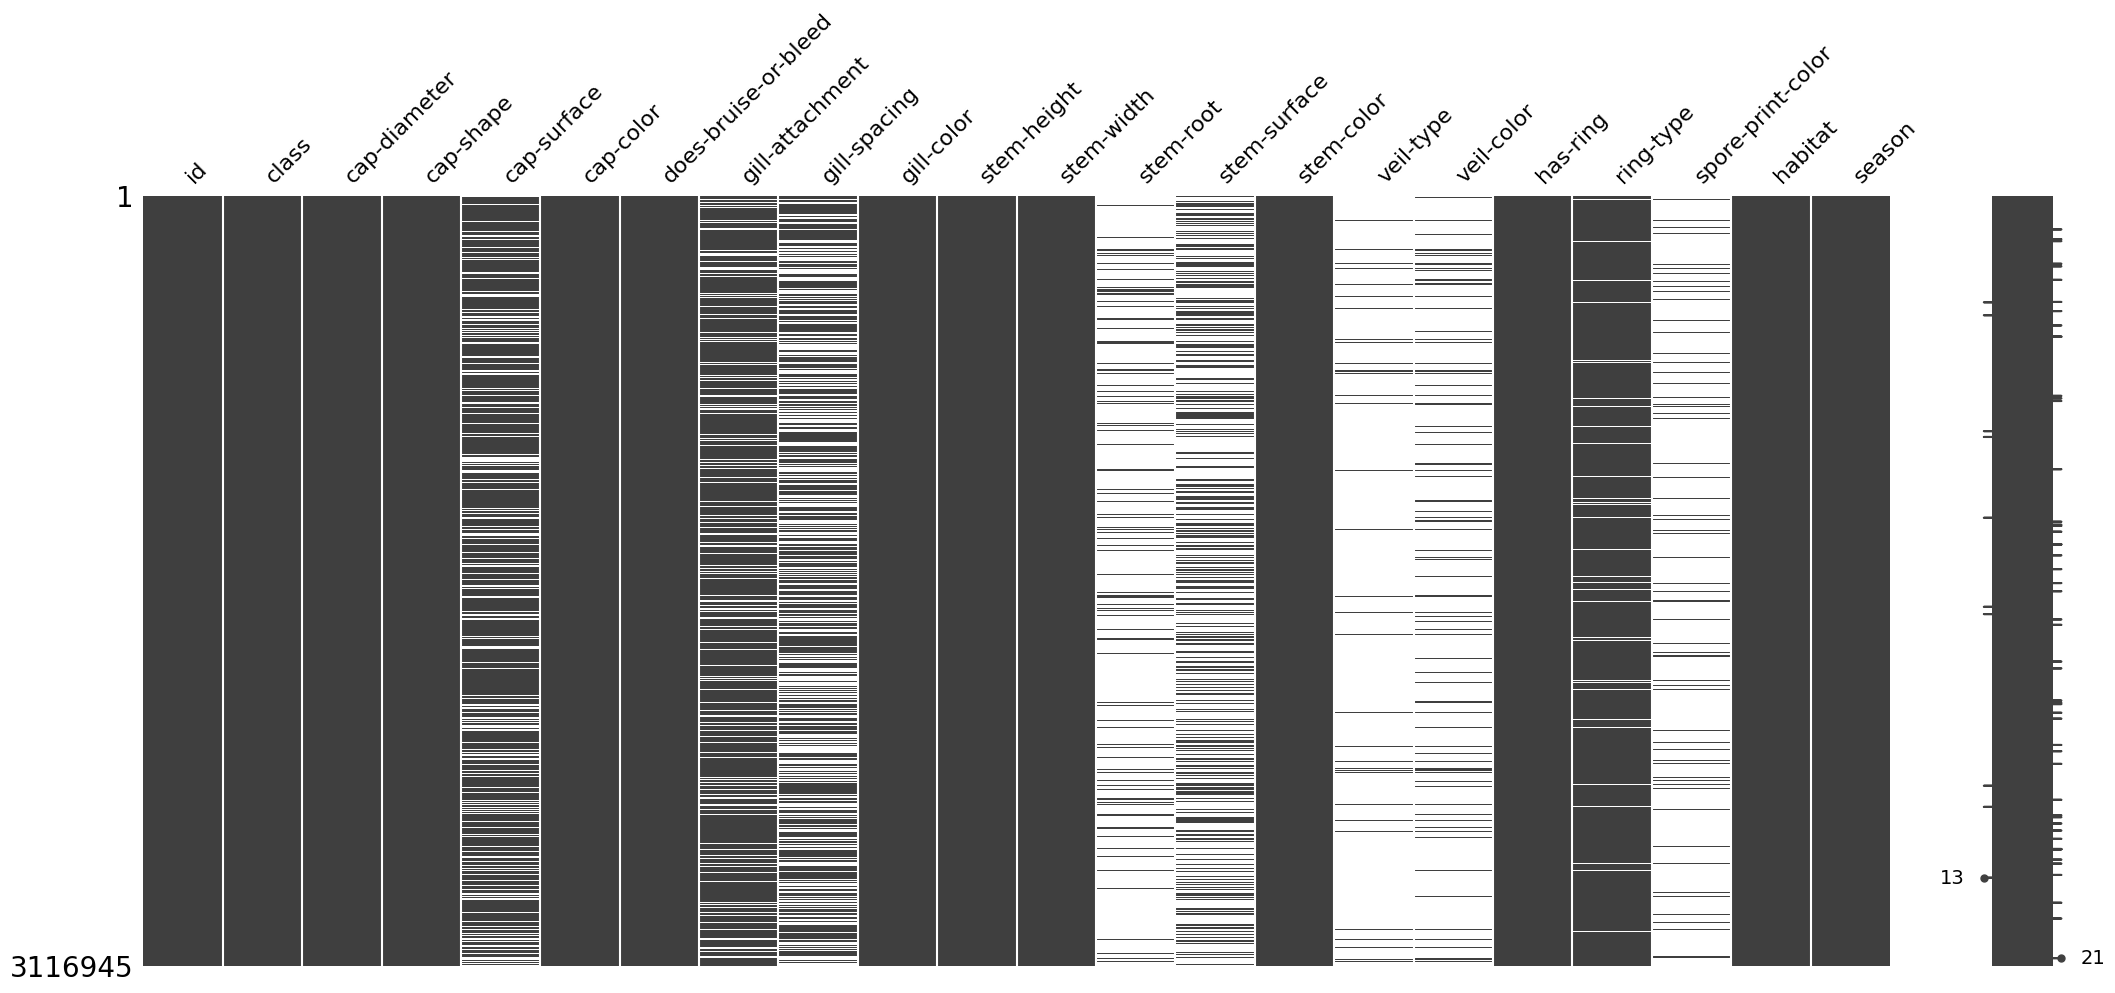

In [11]:
msno.matrix(mushroom_train_df);

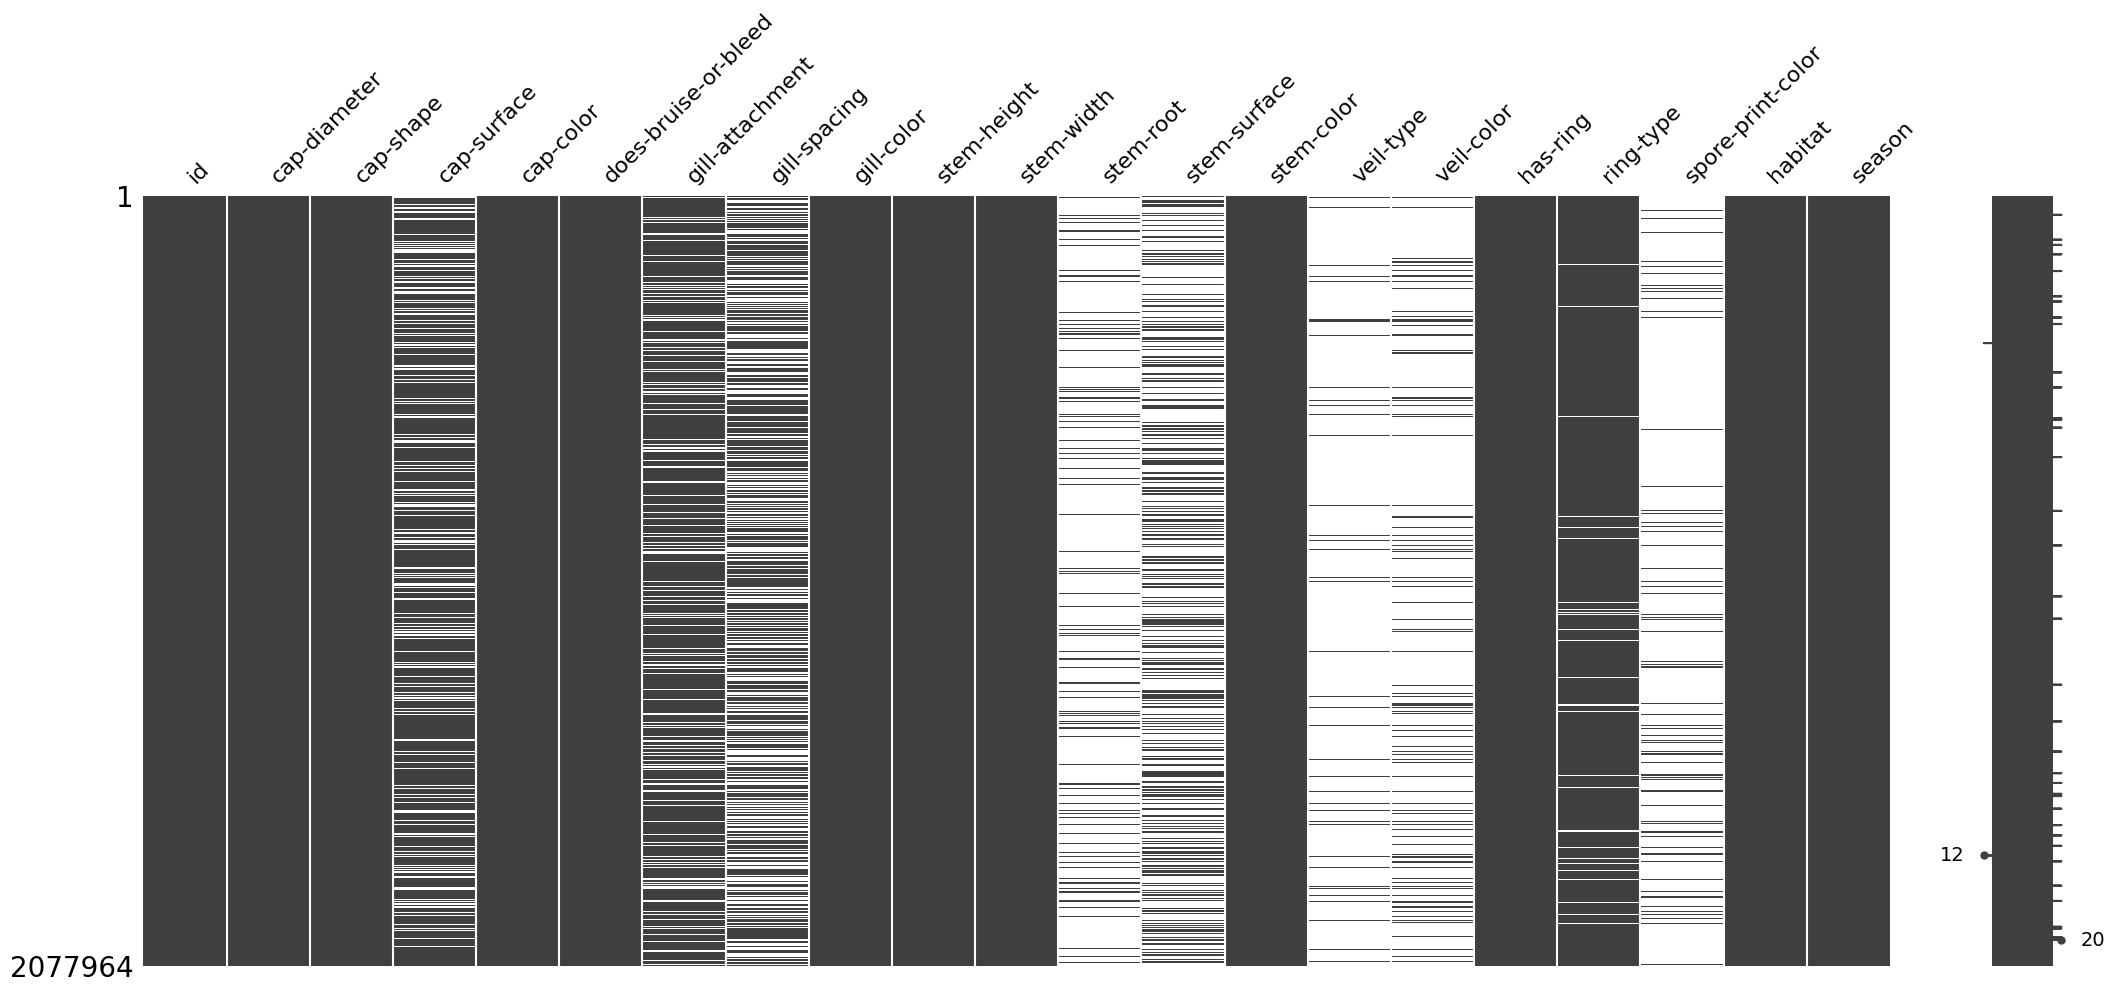

In [12]:
msno.matrix(mushroom_test_df);

We notice that there are some features that are missing almost completely. In this particular problem handling missing data should be very strict, so we'll define a certain threshold in order to eliminate certain features and impute the others with the mode (the most frequent category).

First we select the features that have the highest number of missing data for both the training and testing sets.

In [13]:
columnsToDropTrain = []
for col in mushroom_train_df.columns.to_list():
    missingPercentage = (mushroom_train_df[col].isnull().sum()/len(mushroom_train_df))*100
    if missingPercentage > 10:
        columnsToDropTrain.append(col)

In [14]:
columnsToDropTrain

['cap-surface',
 'gill-attachment',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']

In [15]:
columnsToDropTest = []
for col in mushroom_train_df.columns.to_list():
    missingPercentage = (mushroom_train_df[col].isnull().sum()/len(mushroom_train_df))*100
    if missingPercentage > 10:
        columnsToDropTest.append(col)

In [16]:
columnsToDropTest == columnsToDropTrain

True

Since the features space of missing data is the same we can use one of them to drop the columns.

In [17]:
mushroom_train_df.drop(columns = columnsToDropTrain, axis = 1, inplace = True)
mushroom_test_df.drop(columns = columnsToDropTrain, axis = 1, inplace = True)

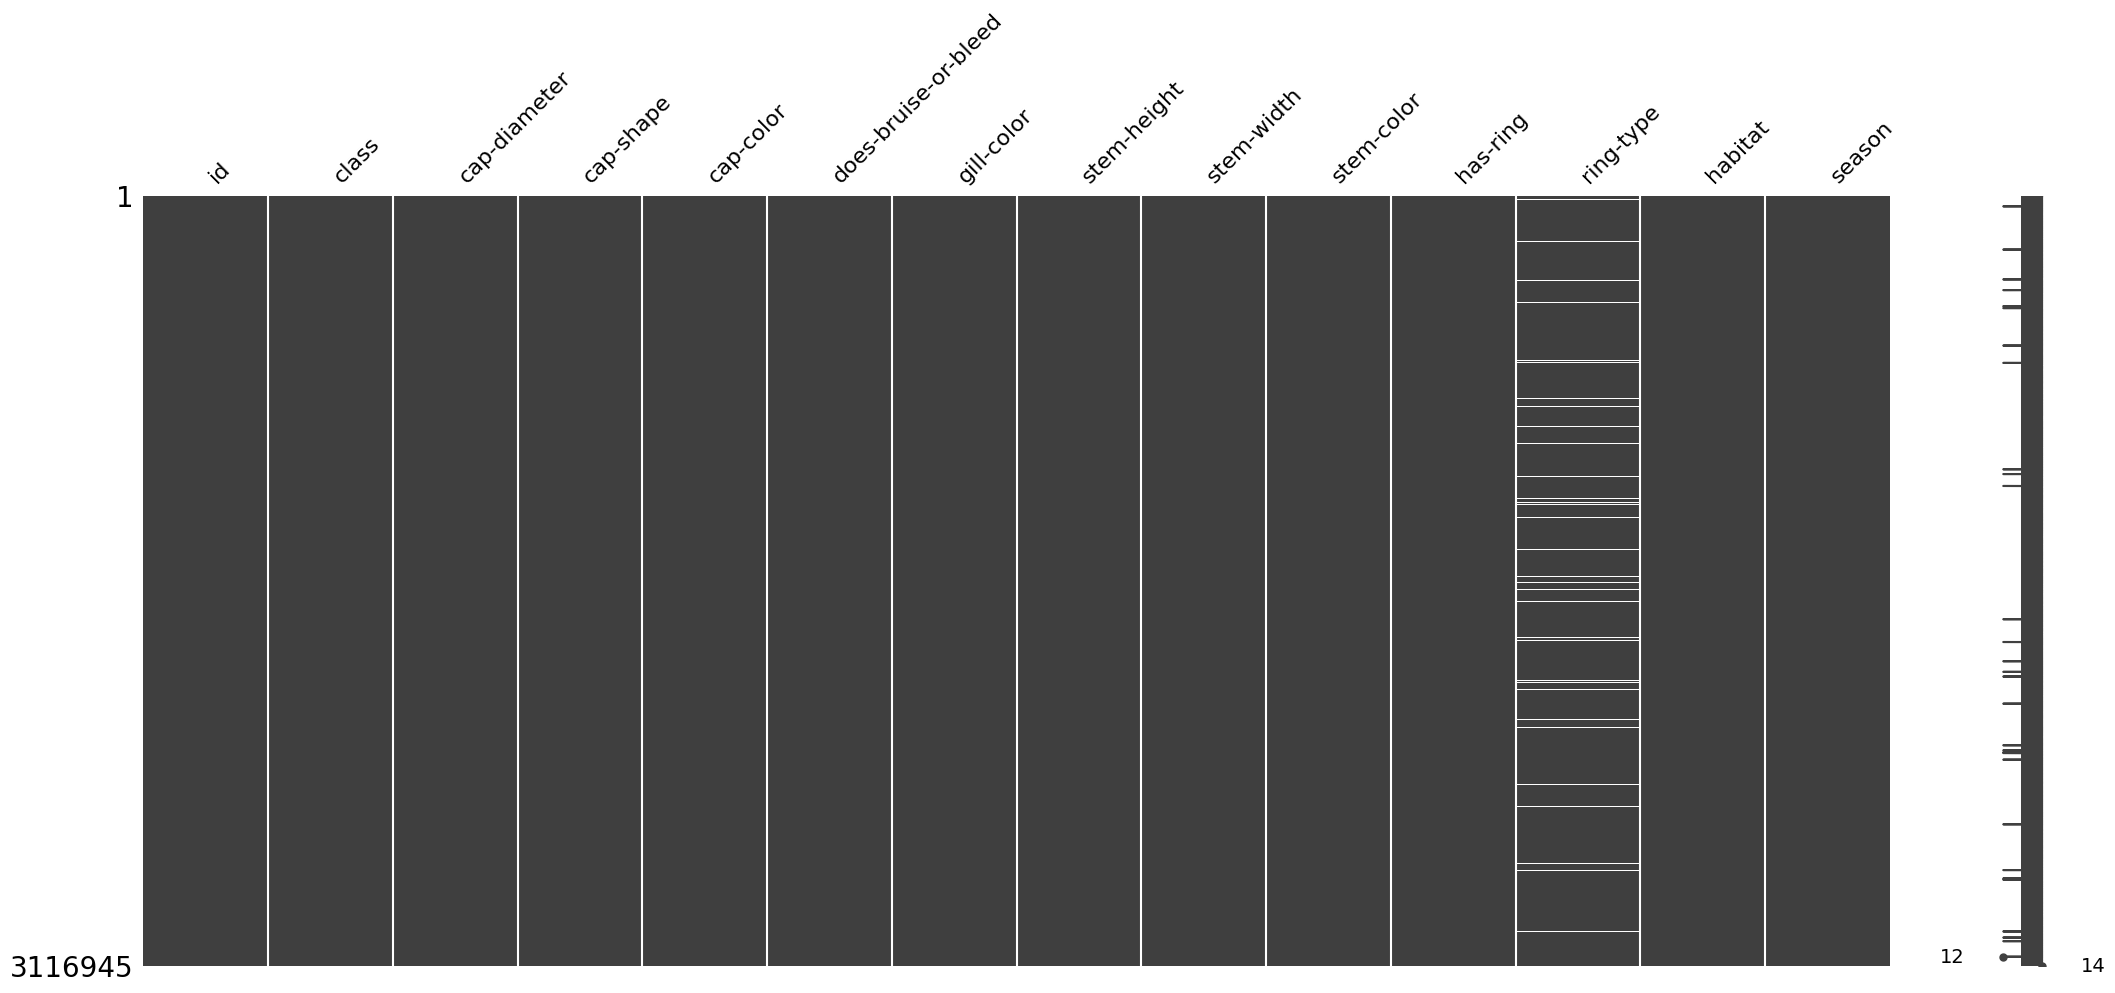

In [18]:
msno.matrix(mushroom_train_df);

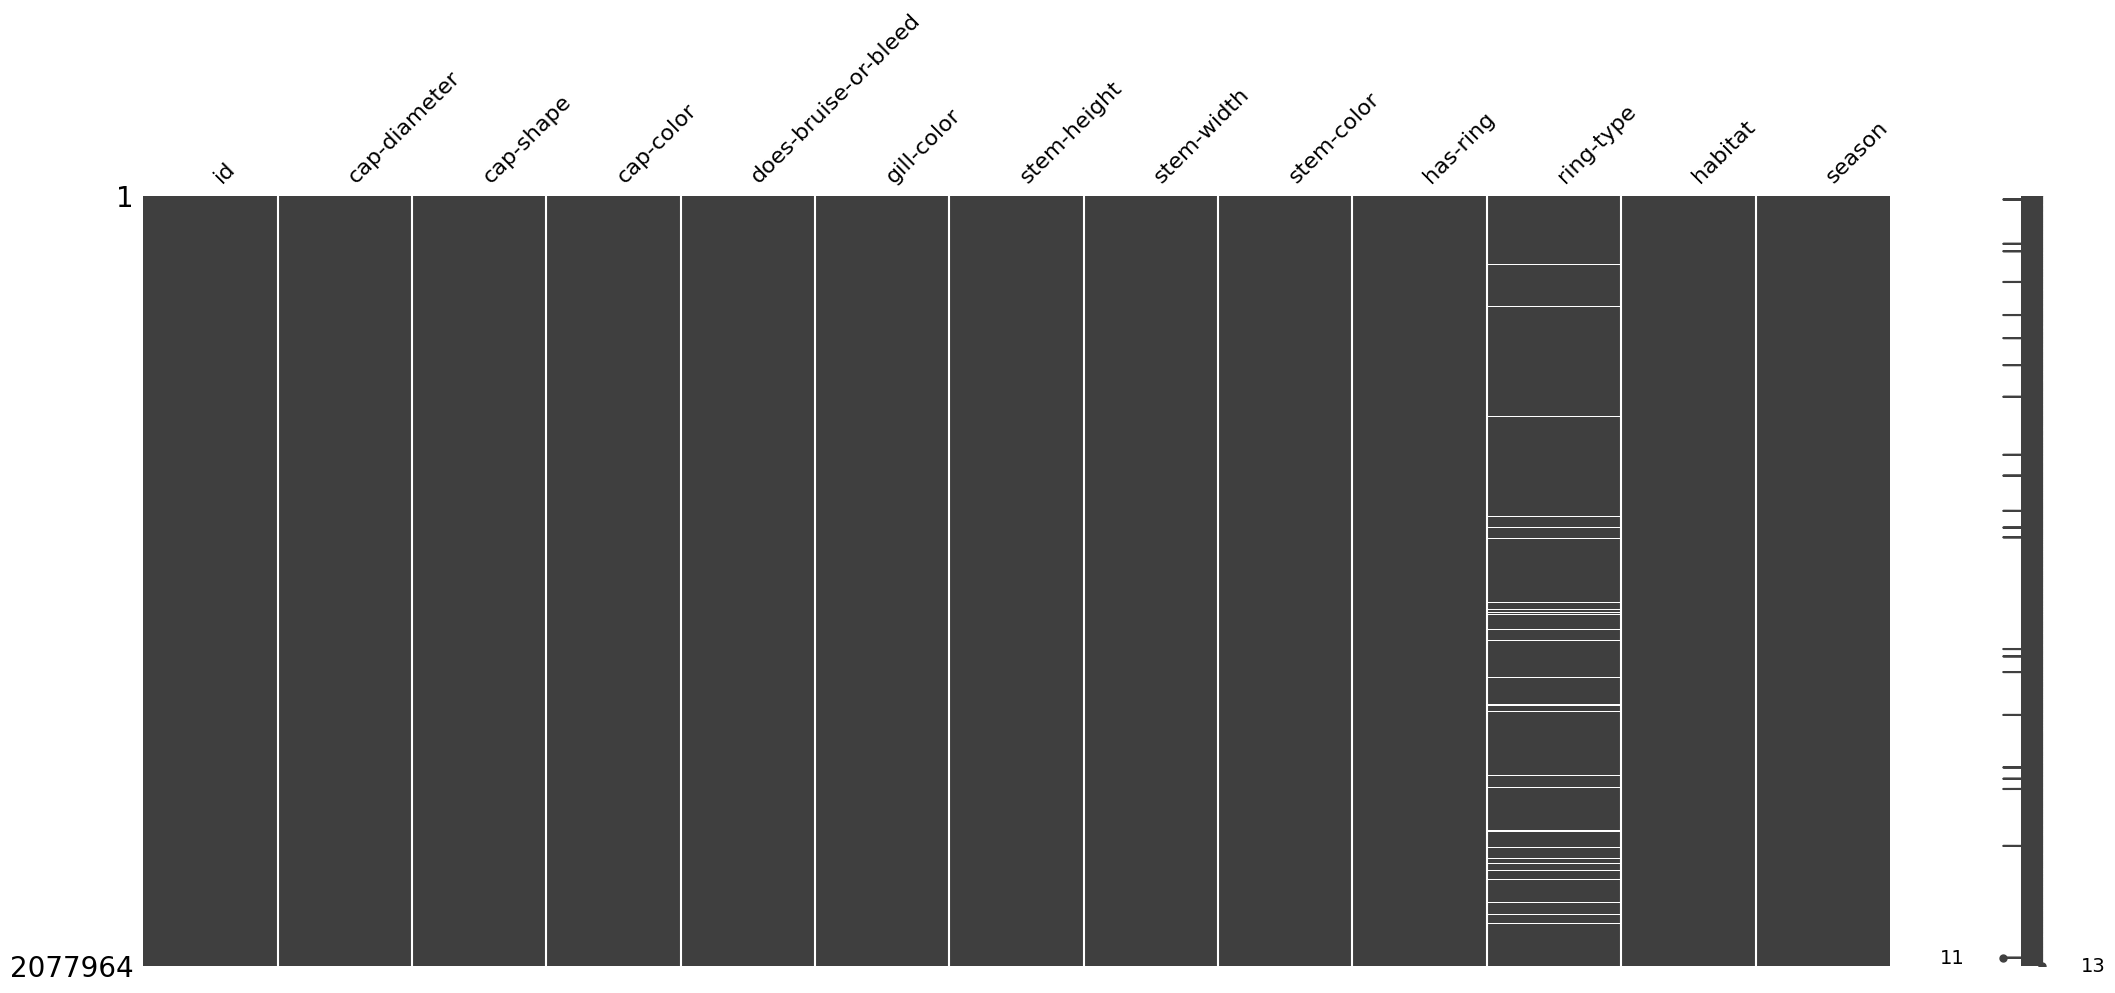

In [19]:
msno.matrix(mushroom_test_df);

We need to check for the number of missing values so that we can't miss any feature.

In [20]:
mushroom_train_df.isnull().sum()

id                           0
class                        0
cap-diameter                 4
cap-shape                   40
cap-color                   12
does-bruise-or-bleed         8
gill-color                  57
stem-height                  0
stem-width                   0
stem-color                  38
has-ring                    24
ring-type               128880
habitat                     45
season                       0
dtype: int64

In [31]:
mushroom_test_df.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [22]:
for col in mushroom_train_df.columns.to_list():
    if col in numCols:
        mushroom_train_df[col].fillna(mushroom_train_df[col].mean(), inplace = True)
    else:
        mushroom_train_df[col].fillna(mushroom_train_df[col].mode()[0], inplace = True)

In [27]:
for col in mushroom_test_df.columns.to_list():
    if col in numCols:
        mushroom_test_df[col].fillna(mushroom_test_df[col].mean(), inplace = True)
    else:
        mushroom_test_df[col].fillna(mushroom_test_df[col].mode()[0], inplace = True)

In [24]:
mushroom_train_df.isnull().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [30]:
mushroom_test_df.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

------------------

* **Duplicates**

In [33]:
mushroom_train_df[mushroom_train_df.duplicated()]

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season


In [34]:
mushroom_test_df[mushroom_test_df.duplicated()]

,id,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season


Now we need to look seprately to the categorical and numerical data and try to make some corrections if needed.

--------------

### Categorical features

In [35]:
catCols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

We start by binary features which take only two categories since they are the simplest.

* **Class**

In [36]:
mushroom_train_df["class"].value_counts()

p    1705396
e    1411549
Name: class, dtype: int64

The `class` feature seems to be clean and a certain balance. We have two categories that indicate if the mushroom is poisonous or edible.

***Notice*** : Test data doesn't have the `class` feature since it should be submitted.

* **has-ring**

This is a boolean feature that takes only two values as an answer (`t` or `f`)

In [38]:
mushroom_train_df["has-ring"].value_counts()

f             2368844
t              747982
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: has-ring, dtype: int64

We need to keep only the true and false values for this feature.

In [40]:
mushroom_train_df = mushroom_train_df[mushroom_train_df["has-ring"].isin(['f', 't'])]

In [43]:
mushroom_test_df = mushroom_test_df[mushroom_test_df["has-ring"].isin(['f', 't'])]

In [41]:
mushroom_train_df["has-ring"].value_counts()

f    2368844
t     747982
Name: has-ring, dtype: int64

In [44]:
mushroom_test_df["has-ring"].value_counts()

f    1578111
t     499759
Name: has-ring, dtype: int64